## [Ensemble Learning](https://drive.google.com/file/d/1K6a9HZS5NyDWdhezu0gocbQAEUkbUwPl/view?usp=sharing)
Ensemble learning is a technique in machine learning where multiple models, often called "weak learners," are trained to address the same problem and are then combined to achieve better performance than any single model could. This approach leverages the diversity among models to reduce errors due to bias or variance in individual predictions. Ensemble methods can be used for both classification and regression tasks and typically fall into three categories:

1. **Bagging (Bootstrap Aggregating)**
2. **Boosting**
3. **Stacking (Stacked Generalization)**


### 1. Bagging (Bootstrap Aggregating)
[BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) | [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

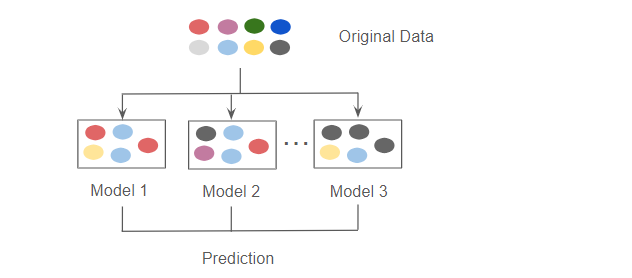

**Concept:** Bagging involves creating multiple models (typically of the same type), each trained on a **random subset of the training data**. The subsets are drawn with replacement, known as bootstrapping. The final prediction is made by averaging the predictions (for regression problems) or by taking a majority vote (for classification problems).

Let's illustrate the concept of bagging with a simple and relatable example: predicting the quality of wine based on various features like acidity, sugar level, alcohol content, etc. Suppose you are a novice wine taster, and you want to develop a model to predict wine quality.

**Individual Models Without Bagging**

First, imagine training several individual models to predict wine quality. Each model is like a different wine taster, and they all have their unique tasting methods. One model might focus heavily on acidity, another on sugar levels, and yet another on alcohol content. Since each model (or taster) focuses on different aspects, their predictions for the same wine can vary widely. Some might be very accurate in certain instances and completely off in others, leading to a high variance in predictions.

**Applying Bagging**

Now, let's apply the bagging approach. Instead of relying on a single model's prediction, you create an ensemble of models, where each model is trained on a random subset of the training data (imagine each taster only tasting a random selection of the entire wine collection). Because the models are trained on different subsets of the data, they learn to predict wine quality based on different aspects and characteristics of the wine.

**Combining Predictions**

Once all models have made their predictions, you don't just pick the prediction of one model. Instead, you aggregate the predictions of all models, typically by taking the average (for regression problems like predicting a quality score) or the majority vote (for classification problems, e.g., classifying wine into categories like high, medium, or low quality).

**The Result**

By aggregating the predictions, the ensemble's final prediction is less sensitive to the peculiarities of any single model. If one model predicts the quality to be much higher than it should be based on its unique tasting criteria, and another predicts it much lower, these extreme predictions can cancel each other out in the averaging process, leading to a more accurate and stable final prediction.

**Why It Works**

This method works well because it effectively reduces the variance without significantly increasing the bias. No single model's quirks dominate the final prediction, making the ensemble's prediction more reliable than any individual model's guess. It's like consulting a group of wine tasters instead of relying on just one—they might each make some mistakes, but their collective judgment is likely to be more accurate on average.

**Example:** *Random Forest* is a classic example of bagging where multiple decision trees are trained on different subsets of the training data. For a regression problem, if five trees predict the values of 10, 12, 11, 9, and 10 for a particular sample, the final prediction would be the average: $ (10 + 12 + 11 + 9 + 10) / 5 = 10.4 $. For a classification problem, if the prediction from five trees for a sample is [cat, cat, dog, cat, dog], the final prediction would be 'cat' as it is the majority.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the California housing dataset
data = fetch_california_housing()
feature_names = data.feature_names
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base estimators
estimator_1 = DecisionTreeRegressor()
estimator_2 = LinearRegression()

# Initialize the Bagging regressor with 10 estimators
bagging_regressor = BaggingRegressor(estimator=estimator_1, n_estimators=10, random_state=42)

# Fit the model
bagging_regressor.fit(X_train, y_train)

# Make predictions
predictions = bagging_regressor.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)


R^2 Score: 0.7844762342339637


In [2]:
# Extract feature importances for each tree
for i, tree in enumerate(bagging_regressor.estimators_):
    print(f"Tree {i+1} feature importances:")
    for feature_name, importance in zip(feature_names, tree.feature_importances_):
        print(f"{feature_name}: {importance}")
    print("---------------------------------")

Tree 1 feature importances:
MedInc: 0.5371171195896982
HouseAge: 0.060559266808299504
AveRooms: 0.05291099123902993
AveBedrms: 0.026699855754815104
Population: 0.03939129930105988
AveOccup: 0.13417093185361062
Latitude: 0.07074932373682256
Longitude: 0.0784012117166643
---------------------------------
Tree 2 feature importances:
MedInc: 0.5046072955577671
HouseAge: 0.0511857522928054
AveRooms: 0.03615316664506402
AveBedrms: 0.0278091255121323
Population: 0.027705122416302613
AveOccup: 0.14180752409843142
Latitude: 0.10588456095751816
Longitude: 0.10484745251997912
---------------------------------
Tree 3 feature importances:
MedInc: 0.5127410934107334
HouseAge: 0.053160563174034774
AveRooms: 0.0338921117848507
AveBedrms: 0.027419112479241625
Population: 0.03092681126615477
AveOccup: 0.1473139381777373
Latitude: 0.09751599024257661
Longitude: 0.09703037946467089
---------------------------------
Tree 4 feature importances:
MedInc: 0.5419597585053457
HouseAge: 0.0571112492964541
AveRoom

#### [Randrom Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the California housing dataset
data = fetch_california_housing()
feature_names = data.feature_names
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model
random_forest_regressor.fit(X_train, y_train)

# Make predictions
predictions = random_forest_regressor.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)


R^2 Score: 0.7831038080291017


In [4]:
# Extract feature importances for each tree
for i, tree in enumerate(random_forest_regressor.estimators_):
    print(f"Tree {i+1} feature importances:")
    for feature_name, importance in zip(feature_names, tree.feature_importances_):
        print(f"{feature_name}: {importance}")
    print("---------------------------------")

Tree 1 feature importances:
MedInc: 0.5364110252199703
HouseAge: 0.061136179837297
AveRooms: 0.05462270271250828
AveBedrms: 0.028007715572215597
Population: 0.038459826957715625
AveOccup: 0.1336949556167921
Latitude: 0.07012355251208194
Longitude: 0.0775440415714191
---------------------------------
Tree 2 feature importances:
MedInc: 0.5050215843894205
HouseAge: 0.05082413149470552
AveRooms: 0.036140932433465826
AveBedrms: 0.028220309938613086
Population: 0.025531322772685515
AveOccup: 0.1430348915220854
Latitude: 0.10740369793668152
Longitude: 0.10382312951234256
---------------------------------
Tree 3 feature importances:
MedInc: 0.5130268376859589
HouseAge: 0.05467030265920032
AveRooms: 0.03339948513315309
AveBedrms: 0.027521557368732193
Population: 0.02959824142693077
AveOccup: 0.14702819130503902
Latitude: 0.09794503538167539
Longitude: 0.09681034903931032
---------------------------------
Tree 4 feature importances:
MedInc: 0.5409285006537908
HouseAge: 0.05689548232524607
AveRo

### 2. Boosting

Boosting involves sequentially training models, where each new model attempts to correct errors made by the previous models. The models are weighted based on their accuracy, and predictions are made by weighting the contribution of each model. Boosting can reduce bias and variance.

#### AdaBoost

Boosting is a powerful ensemble learning technique where multiple weak learners are combined to create a strong learner. AdaBoost, short for Adaptive Boosting, is a popular algorithm that illustrates the concept of boosting. Here's how it works:

Imagine you're preparing for a difficult exam, and you decide to seek help from multiple tutors. Each tutor has their strengths and weaknesses, but you combine their expertise to improve your understanding overall.

1. **Initial Model (Tutor)**: You start by studying with the first tutor, who helps you learn the material. However, they may not cover all topics comprehensively, leading to some gaps in your understanding.

2. **Weights on Incorrectly Predicted Instances**: After the first study session, you identify the topics where you struggled the most. You realize that these topics are crucial for the exam, so you decide to focus more on them. Similarly, AdaBoost assigns higher weights to instances (data points) that were incorrectly predicted by the initial model, essentially highlighting the "difficult" cases.

3. **Sequential Improvement**: For the next study session, you bring in a new tutor who specializes in the topics you found challenging. This tutor helps you understand those specific areas better, improving your overall grasp of the material. Similarly, AdaBoost trains a new model, giving more emphasis to the instances that were misclassified by the previous model. This new model focuses on correcting the errors made by its predecessor.

4. **Combining Predictions**: You continue this process, bringing in additional tutors for each subsequent study session, with each tutor addressing the topics where you need the most help. Eventually, you combine the insights from all tutors to create a comprehensive understanding of the material. In AdaBoost, predictions from all models are combined through a weighted voting mechanism, where each model's contribution is proportional to its accuracy.

5. **Final Prediction**: By the end of your study sessions, you have gained a deep understanding of the material, covering all important topics extensively. Similarly, AdaBoost generates the final prediction by combining the predictions of all models, resulting in a strong and accurate overall prediction.

In summary, AdaBoost iteratively improves the model's performance by focusing on the instances where it performs poorly, effectively boosting its ability to make accurate predictions.

In [5]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load California housing dataset
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Regressor with DecisionTreeRegressor as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=4)
adaboost_reg = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)

# Fit the model to the training data
adaboost_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = adaboost_reg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


TypeError: AdaBoostRegressor.__init__() got an unexpected keyword argument 'base_estimator'

#### [Gradient Boost](https://www.youtube.com/watch?v=Nol1hVtLOSg&list=PLc-A_ClQmXKDlVbr9V3VhDZC5jJsPBN3Q)

Gradient Boosting is a powerful machine learning technique used for regression and classification tasks. It sequentially builds an ensemble of models, each aimed at correcting the errors of its predecessors. Beginning with a simple initial model, such as a decision tree, subsequent models focus on predicting the residuals (the differences between actual and predicted values) of the previous ensemble. By minimizing a loss function using gradient descent during training, each new model targets the negative gradients of the loss function with respect to the ensemble's predictions. Finally, predictions from all models are combined, with each model's contribution weighted based on its performance, resulting in a final prediction that effectively reduces overall prediction error.

#### XGBoost (eXtreme Gradient Boosting)

XGBoost (eXtreme Gradient Boosting) is an advanced and efficient implementation of gradient boosting, a machine learning algorithm for regression, classification, ranking, and other predictive tasks. Developed by Tianqi Chen, it has become popular in machine learning competitions for its performance and speed. XGBoost is designed to be highly efficient, flexible, and portable. It can handle various types of data and is capable of performing on large datasets with ease.


In [ ]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model
xgb_reg.fit(X_train, y_train)

# Make predictions
predictions = xgb_reg.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)


### 3. Stacking

**Concept:** Stacking involves training multiple models (potentially of different types) and then training a meta-model on their predictions. The base models are trained on the full training set, and their predictions are used as input features for the meta-model to make the final prediction.

**Example:** Suppose we have three different models: a decision tree, a support vector machine, and a neural network, predicting house prices. Each model predicts prices on the training data, and then a meta-model (e.g., linear regression) is trained on these predictions to make the final price prediction. For a particular house, if the three models predict prices of 200,000; 210,000; and 205,000, these values serve as input features for the meta-model to make the final decision.

In summary, bagging reduces variance and is useful when the model is complex and overfitting. Boosting can adjust for bias and variance but is sensitive to noisy data and outliers. Stacking attempts to harness the strengths of multiple models to improve overall performance, which can be particularly powerful if the base models make errors in different parts of the input space.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Load the California housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base estimators
estimators = [
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('linear', LinearRegression()),
    ('svr', SVR(kernel='linear'))
]

# Initialize the stacking regressor
stacked_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()  # You can use any final estimator here
)

# Fit the model
stacked_reg.fit(X_train, y_train)

# Make predictions
predictions = stacked_reg.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)


## Additional Resources

### AdaBoost Error Calculation

##### AdaBoost Regression

For a regression example with boosting, let's consider a simplified case using Gradient Boosting, another popular boosting method that focuses on minimizing the residual errors of the models. Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. This method can be used for both classification and regression tasks. Here, we'll focus on a regression task with a very simple dataset.

Imagine we have a dataset with just one feature (x) and a continuous target variable (y) to predict:

| x  | y  |
|----|----|
| 1  | 2  |
| 2  | 3  |
| 3  | 5  |
| 4  | 7  |
| 5  | 8  |

We aim to predict \(y\) given \(x\) using Gradient Boosting for regression. The steps we'll follow are:

1. **Initialize with a base model**: Often, this is just the mean of the target variable, but it could be a different simple model.
2. **Compute residuals**: Calculate the difference between the predictions and the actual target values.
3. **Fit a model to the residuals**: Train a model on the original features to predict these residuals.
4. **Predict the target using all models**: Add the predictions of the new model to the predictions of the previous step.
5. **Repeat steps 2-4**: Keep fitting new models to the residuals left by the current ensemble of models.

For simplicity, let's simulate this process manually through two iterations, using very basic models (e.g., decision trees with depth = 1, also known as decision stumps) for step 3, and calculate predictions.

1. **Initialize with the mean of y**: \(mean(y) = 5\)
2. **Compute residuals after the first model** (which is just the mean):
   - Residuals: \([-3, -2, 0, 2, 3]\)
3. **Fit a model to these residuals**. For simplicity, let's say this model predicts +2 for \(x > 3\) and -2.5 for \(x \leq 3\).
4. **Update predictions** by adding the predictions of this new model to the mean.

Let's calculate the updated predictions after adding this model and then proceed to a second iteration to illustrate how Gradient Boosting iteratively reduces the residual error.

Here's how the process unfolded:

- **Initial predictions** were all 5, the mean of \(y\).
- After **computing the residuals**, we observed differences between the actual values of \(y\) and our predictions. These residuals were \([-3, -2, 0, 2, 3]\).
- Our **simplified first model** was applied, resulting in adjusted predictions of \([2.5, 2.5, 2.5, 7, 7]\). This model effectively added corrections based on the feature \(x\).
- After adding these corrections, the **new residuals** became \([-0.5, 0.5, 2.5, 0, 1]\).
- For our **second iteration**, we assumed a model that made further adjustments, resulting in **updated predictions** of \([3, 3, 3, 6, 6]\).

This example simplifies the actual models and calculations that would occur in gradient boosting but illustrates the iterative process of fitting models to residuals to improve predictions. In each iteration, the model tries to correct the mistakes of the ensemble of previous models, progressively improving the accuracy of the predictions. In practice, gradient boosting would use decision trees as weak learners and optimize their parameters to minimize the loss function, which in the case of regression, is often mean squared error.

##### AdaBoost Classfication

Let's assume we have a dataset with five data points and a binary classification task. The features are just single values for simplicity, and the goal is to classify each data point as either +1 or -1.

| Data Point | Feature (x) | Label (y) |
|------------|-------------|-----------|
| 1          | 1           | +1        |
| 2          | 2           | +1        |
| 3          | 3           | -1        |
| 4          | 4           | -1        |
| 5          | 5           | +1        |

We'll follow these steps:

1. **Initialize weights**: Each data point is given an equal initial weight. Since we have 5 data points, each weight is 1/5 = 0.2.
2. **Train a weak learner**: Fit a weak model (like a decision stump) to the data. The goal is to minimize weighted error.
3. **Calculate the error**: Error is calculated as the sum of weights where the prediction is wrong.
4. **Compute the model's weight (alpha)**: This is based on the error; a lower error means a higher weight for the model.
5. **Update data point weights**: Increase weights for wrongly predicted points, so the next model pays more attention to them.
6. **Repeat**: Go back to step 2, using the updated weights.

Let's simulate this process for the first iteration:

1. Initial weights: 0.2 for each data point.
2. Train a weak learner (decision stump). Let's say it splits at `x < 3.5` to predict +1 for `x < 3.5` and -1 otherwise. This model makes a mistake on data points 4 and 5.
3. Calculate error: $error = 0.2 (for\ 4) + 0.2 (for\ 5) = 0.4$.
4. Compute the model's weight ($\alpha$): $\alpha = \frac{1}{2} \log \left(\frac{1-error}{error}\right) = \frac{1}{2} \log \left(\frac{0.6}{0.4}\right)$.
5. Update weights: Increase for wrongly predicted (4, 5) and decrease for correctly predicted. The formula for updating is $weight_{new} = weight_{old} \cdot \exp(\alpha)$ for incorrectly classified and $weight_{new} = weight_{old} \cdot \exp(-\alpha)$ for correctly classified.

Let's calculate the exact values for $\alpha$ and the updated weights.

After the first iteration of boosting with AdaBoost, the model's weight ($\alpha$) is approximately 0.203. This weight reflects the importance of this first model in the final prediction.

The updated weights for each data point are as follows:

- Data Point 1: 0.163
- Data Point 2: 0.163
- Data Point 3: 0.163
- Data Point 4: 0.245 (incorrectly predicted, hence the weight increased)
- Data Point 5: 0.245 (incorrectly predicted, hence the weight increased)

These updated weights will be used in the next iteration to help the new model focus more on the incorrectly predicted instances (4 and 5 in this case). This process repeats, with each new model focusing more on the mistakes of the previous ones until a stopping condition is met, such as a maximum number of models or an acceptable error rate.